In [1]:
import pandas as pd 
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud,STOPWORDS

In [2]:
df_orig = pd.read_csv("resume_dataset.csv")
df = df_orig.copy(deep = True)

In [3]:
length = df["Resume"].shape
length

(1219,)

In [4]:
df["res_new"] = df["Resume"]
eval_res = df["res_new"].copy(deep=True)

In [5]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

In [6]:
#eval_res = Resumes
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        eval_res[i] = eval(eval_res[i]).decode()
    except:
        l.append(i)
        pass

In [7]:
eval_res.shape

(1219,)

In [8]:
df["res_new"] = eval_res
df = df.drop(l,axis=0)
df = df.reset_index(drop = True)

In [9]:
df.shape

(1212, 4)

In [10]:
df = df[["ID","Category","res_new","Resume"]]
df['res_new'].replace('', np.nan, inplace=True)
df.dropna(subset=['res_new'], inplace=True)
df = df.reset_index(drop = True)
df.shape
df.head()

,ID,Category,res_new,Resume
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [11]:
length = df["res_new"].shape
eval_res = df["res_new"].copy(deep=True)
df.shape

(1199, 4)

In [12]:
for i in range(length[0]):
    eval_res[i] = " ".join(eval_res[i].split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res[i])) #Removing punctaution later since we need punctaution for sentence tokenization
    eval_res[i] = " ".join(token).lower()
eval_res_backup  = eval_res.copy(deep = True)

In [13]:
for i in range(length[0]):
    eval_res[i] = (eval_res[i].encode("ASCII","ignore")).decode() #encoding the text to ascii.
eval_res.shape

(1199,)

In [14]:
df["res_new"] = eval_res

In [15]:
df_cols = ["ID","Category","res_new","Resume"]
df = df[df_cols]
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [16]:
REGEX_SPACE = re.compile("[ ][ ]+")
REGEX_JUNK = re.compile("[^A-WX-wyz][xX][^A-WX-wyz]+[ ]*|[.\-\_][.\-\_]+")
REGEX_EMAIL = re.compile("[Xx]+[._]?[Xx]+.@.[Xx]+\.?[Xx]+")
REGEX_PNO = re.compile("[(][xX][xX][xX][)][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][\-][xX][xX][xX]+[-][xX][xX][xX]+")

In [17]:
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [18]:
df["newer_res"] = df["res_new"] 
for i,j in enumerate(df.itertuples()):
    strin = re.sub(REGEX_PNO,"",j[3])
    strin = re.sub(REGEX_EMAIL,"",strin)
    strin = re.sub(REGEX_SPACE,"",strin)
    strin  =re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', strin)
    strin = re.sub(REGEX_JUNK, "" ,strin)
    df["newer_res"][i] = strin

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df = df[["ID","Category","newer_res","Resume"]]
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [20]:
df = df[["ID","Category","newer_res","Resume"]]
df['newer_res'].replace('', np.nan, inplace=True)
df.dropna(subset=['newer_res'], inplace=True)
df = df.reset_index(drop = True)
df.shape

(1199, 4)

In [21]:
df.to_csv("clean_data1.csv")
print("Cleaned dataset written to cleaned_data.csv")

Cleaned dataset written to cleaned_data.csv


In [24]:
freq = list(collections.Counter(df["Category"]).items())
freq = list(zip(*freq))

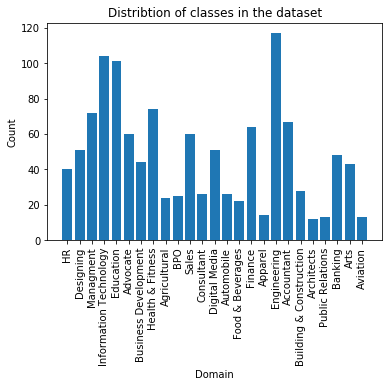

In [25]:
plt.bar(freq[0],freq[1])
plt.ylabel("Count")
plt.xlabel("Domain")
plt.title("Distribtion of classes in the dataset")
plt.xticks(rotation=90)
plt.show()

### We can see here that the resume distribution amongst various classes are not uniform. Categories such as Engineering, Information Technology and Engineering seems to dominate more.

## Frequency of words in the resume 

In [26]:
sw = set(STOPWORDS)
eval_res = df["newer_res"].copy(deep=True)
sw_data=''
for i in eval_res:
    #token = nltk.word_tokentize()
        sw_data+=i
len(sw_data)

6518333

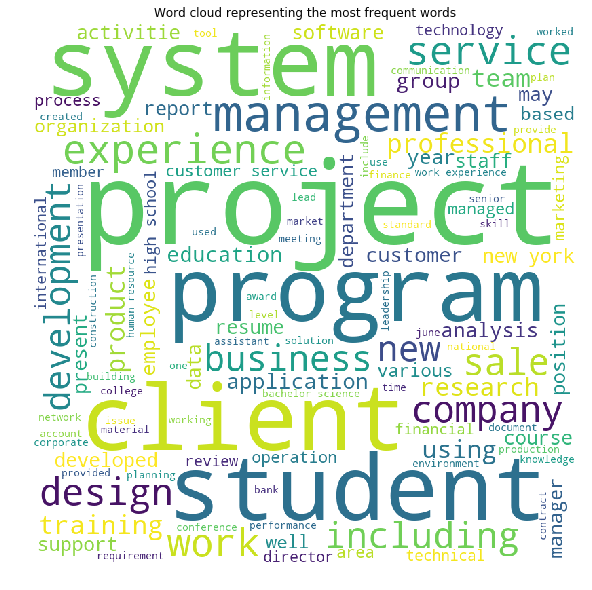

In [27]:
sw = STOPWORDS.union(set(string.punctuation))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw,
                min_font_size = 13).generate(sw_data)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Word cloud representing the most frequent words")
plt.axis("off") 
plt.tight_layout(pad = 0)

### Words such as "Project", "System", "Managment", "Student" are more likely to occur in resumes.  

## Frequency of Adjectives used 

In [28]:
length = df.shape

def pos_tag(s):
    return nltk.pos_tag(s)

adj_list={}
for i in range(length[0]):
    token = nltk.word_tokenize(eval_res[i])
    pos_token = pos_tag(token)
    for i,tag in pos_token:
        if tag in ["JJ","JJR","JJS"]:
            if i in adj_list:
                adj_list[i]+=1
            else:
                adj_list[i] = 1

In [29]:
df.shape

(1199, 4)

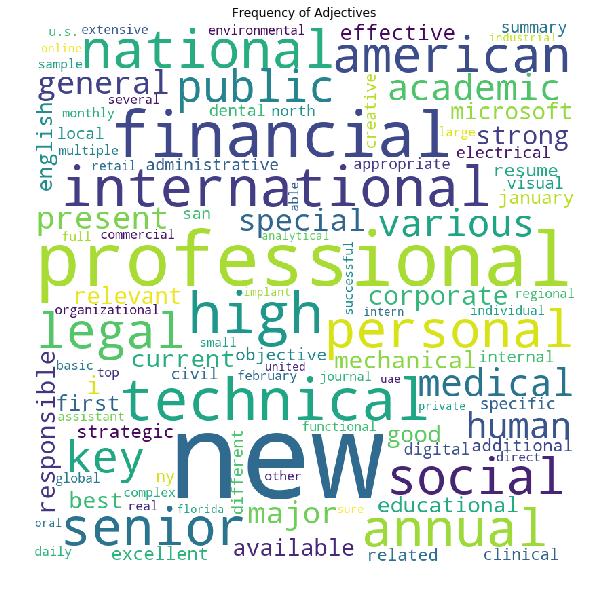

In [30]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 15).generate_from_frequencies(adj_list)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Frequency of Adjectives")
plt.axis("off") 
plt.tight_layout(pad = 0)

In [31]:
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [32]:
class_dict = {}
for i in df.itertuples():
    if i[2] not in class_dict:
        class_dict[i[2]] = " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))
    else:
        class_dict[i[2]]+= " " +  " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))

In [33]:
from collections import Counter
window = 2
ngram={}
p=0
for i in class_dict:
    ngram[i]={}
    token = nltk.word_tokenize(class_dict[i])
    for j in range(window,len(token)):
        val = tuple(token[j-2:j])
        if val not in ngram[i]:
            ngram[i][val] = 1
        else:
            ngram[i][val]+=1

### Top 10 most occuring bigrams under each class 

In [34]:
{i:sorted(list(j.items()),key=lambda x:x[1],reverse=True)[:10] for (i,j) in ngram.items()}

{'HR': [(('human', 'resources'), 154),
  (('human', 'resource'), 48),
  (('hr', 'policies'), 32),
  (('employee', 'relations'), 32),
  (('training', 'development'), 25),
  (('hr', 'assistant'), 18),
  (('job', 'descriptions'), 18),
  (('professional', 'experience'), 17),
  (('resources', 'manager'), 17),
  (('performance', 'management'), 17)],
 'Designing': [(('user', 'experience'), 47),
  (('graphic', 'design'), 45),
  (('graphic', 'designer'), 40),
  (('o', 'o'), 29),
  (('web', 'developer'), 27),
  (('new', 'york'), 25),
  (('html', 'css'), 22),
  (('adobe', 'photoshop'), 18),
  (('user', 'interface'), 17),
  (('ux', 'designer'), 17)],
 'Managment': [(('project', 'management'), 100),
  (('project', 'manager'), 75),
  (('customer', 'service'), 29),
  (('professional', 'experience'), 28),
  (('manager', 'resume'), 27),
  (('business', 'development'), 25),
  (('training', 'development'), 24),
  (('customer', 'satisfaction'), 23),
  (('page', '2'), 22),
  (('sales', 'marketing'), 20)],
